In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "/content/221101235 marina _dataset user_product_ratings_afterpreprocessing_final (1).csv"
data = pd.read_csv(file_path)

In [4]:
#scale
data['rating'] = data['rating'].clip(lower=1, upper=5)

In [6]:
#no of users and items
Tnu = data['user_id'].nunique()
Tni = data['product_id'].nunique()

In [7]:
#no of ratings for every product
product_ratings_count = data.groupby('product_id')['rating'].count()
product_ratings_count

,rating
product_id,
dumbbells,36
elliptical,34
exercise_bike,38
foam_roller,37
kettlebell,39
pull_up_bar,33
resistance_band,35
rowing_machine,41
treadmill,36


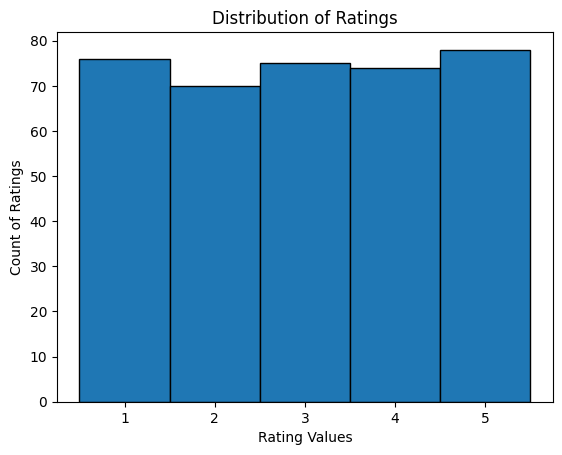

In [9]:
#distribution of ratings
plt.hist(data['rating'].dropna(), bins=[1, 2, 3, 4, 5, 6], edgecolor='black', align='left')
plt.xlabel('Rating Values')
plt.ylabel('Count of Ratings')
plt.title('Distribution of Ratings')
plt.show()

In [10]:
#sparse
sparsity = 1 - (data['rating'].count() / (Tnu * Tni))
print(f"Matrix Sparsity: {sparsity:.2%}")

Matrix Sparsity: 25.40%


In [13]:
#bias
average_rating = data['rating'].mean()
rating_bias = data.groupby('user_id')['rating'].mean() - average_rating
bias_level = rating_bias.abs().mean()
print(f"Average Rating: {average_rating:.2f}")
print(f"Bias Level: {bias_level:.2f}")

Average Rating: 3.02
Bias Level: 0.36


In [14]:
#two lowest-rated items
lowest_rated_items = product_ratings_count.nsmallest(2).index
I1, I2 = lowest_rated_items
print(f"Target Items: I1 = {I1}, I2 = {I2}")

Target Items: I1 = pull_up_bar, I2 = elliptical


In [15]:
results = {
    "Total Users (Tnu)": Tnu,
    "Total Items (Tni)": Tni,
    "Sparsity": sparsity,
    "Average Rating": average_rating,
    "Bias Level": bias_level,
    "Target Items": (I1, I2)
}
print("Results:", results)

Results: {'Total Users (Tnu)': 50, 'Total Items (Tni)': 10, 'Sparsity': 0.254, 'Average Rating': 3.0214477211796247, 'Bias Level': 0.36139807512434313, 'Target Items': ('pull_up_bar', 'elliptical')}


In [16]:
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [18]:
I1_mean = data[data['product_id'] == I1]['rating'].mean()
I2_mean = data[data['product_id'] == I2]['rating'].mean()
print(f"Average Rating for I1: {I1_mean:.2f}, I2: {I2_mean:.2f}")

Average Rating for I1: 2.94, I2: 3.03


In [19]:
mean_ratings = data.groupby('product_id')['rating'].transform('mean')
data['rating_filled'] = data['rating'].fillna(mean_ratings)

In [21]:
user_item_matrix = data.pivot_table(
    index='user_id', columns='product_id', values='rating_filled', fill_value=0
)

In [25]:
#average rating for each item
item_mean_ratings = user_item_matrix.mean(axis=0)
item_mean_ratings

,0
product_id,
dumbbells,2.512222
elliptical,2.302353
exercise_bike,2.080000
foam_roller,2.240000
kettlebell,2.354872
pull_up_bar,1.940000
resistance_band,2.496000
rowing_machine,2.621951
treadmill,2.363889


In [26]:
#difference
mean_diff_matrix = user_item_matrix.subtract(item_mean_ratings, axis=1)
mean_diff_matrix

product_id,dumbbells,elliptical,exercise_bike,foam_roller,kettlebell,pull_up_bar,resistance_band,rowing_machine,treadmill,yoga_mat
user_id,,,,,,,,,,
User1,1.487778,2.697647,-2.08,-0.24,-2.354872,-1.94,-0.496,0.378049,1.636111,2.381818
User10,1.487778,2.697647,-0.08,-0.24,-1.354872,3.06,0.504,1.378049,-2.363889,1.381818
User11,-2.512222,-2.302353,-0.08,1.76,1.645128,0.06,-1.496,-1.621951,-2.363889,-2.618182
User12,-1.512222,-0.302353,-1.08,2.76,-0.354872,-1.94,0.504,-2.621951,-1.363889,1.381818
User13,-0.512222,-0.302353,-2.08,2.76,-2.354872,1.06,1.504,1.378049,2.636111,-1.618182
User14,2.487778,2.697647,-1.08,-2.24,-2.354872,-1.94,2.504,-2.621951,-2.363889,0.381818
User15,-2.512222,2.697647,-2.08,-1.24,0.645128,-1.94,-2.496,-0.621951,0.636111,0.381818
User16,1.487778,2.697647,2.92,-1.24,0.645128,-0.94,0.504,0.378049,-0.363889,1.381818
User17,0.487778,-2.302353,-0.08,-2.24,1.645128,-1.94,0.704,0.378049,0.636111,0.381818


In [27]:
#covariance
covariance_matrix = np.cov(mean_diff_matrix.T)

In [28]:
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[ 3.08755858  0.82977925  0.67870748  0.27478458 -0.47561602  0.03306122
   0.8696644   0.38227974 -0.07114827  0.13751804]
 [ 0.82977925  3.31975284 -0.4562545   0.49798319 -0.51974267 -0.24739496
   0.14493157  0.25931836  0.68893557  0.33737859]
 [ 0.67870748 -0.4562545   2.89142857 -0.59102041  0.39698587  0.24979592
   0.1962449  -0.04977601 -0.52743764  0.50426716]
 [ 0.27478458  0.49798319 -0.59102041  3.28816327 -0.77555207 -0.25061224
  -0.47657143  0.31508213  0.45396825 -0.06604824]
 [-0.47561602 -0.51974267  0.39698587 -0.77555207  3.12700721 -0.21270539
  -0.68573103 -0.80014295 -0.21779173 -0.55200038]
 [ 0.03306122 -0.24739496  0.24979592 -0.25061224 -0.21270539  3.44530612
   0.60179592  0.6259333  -0.67953515  0.26604824]
 [ 0.8696644   0.14493157  0.1962449  -0.47657143 -0.68573103  0.60179592
   3.25426939  0.00358387  0.15891156 -0.2193692 ]
 [ 0.38227974  0.25931836 -0.04977601  0.31508213 -0.80014295  0.6259333
   0.00358387  2.65017786  0.2660

In [29]:
#top 5 and top 10
similarity_matrix = cosine_similarity(mean_diff_matrix.T)
top_5_peers = np.argsort(-similarity_matrix, axis=1)[:, 1:6]
top_10_peers = np.argsort(-similarity_matrix, axis=1)[:, 1:11]

In [31]:
product_ids = user_item_matrix.columns.to_numpy()
top_5_peers_map = {product_ids[i]: product_ids[top_5_peers[i]] for i in range(len(product_ids))}
top_10_peers_map = {product_ids[i]: product_ids[top_10_peers[i]] for i in range(len(product_ids))}

print(f"Top 5 Peers for I1: {top_5_peers_map[I1]}")
print(f"Top 10 Peers for I1: {top_10_peers_map[I1]}")

Top 5 Peers for I1: ['rowing_machine' 'resistance_band' 'yoga_mat' 'exercise_bike' 'dumbbells']
Top 10 Peers for I1: ['rowing_machine' 'resistance_band' 'yoga_mat' 'exercise_bike' 'dumbbells'
 'kettlebell' 'elliptical' 'foam_roller' 'treadmill']


In [32]:
#Reduced dimensional for U (top 5)
pca_5 = PCA(n_components=5)
user_representation_5 = pca_5.fit_transform(user_item_matrix)

In [34]:
I1_index = user_item_matrix.columns.get_loc(I1)
I2_index = user_item_matrix.columns.get_loc(I2)

I1_ratings_pred_5 = np.dot(user_representation_5, pca_5.components_[:, I1_index])
I2_ratings_pred_5 = np.dot(user_representation_5, pca_5.components_[:, I2_index])

In [35]:
pca_10 = PCA(n_components=10)
user_representation_10 = pca_10.fit_transform(user_item_matrix)

In [37]:
I1_index = user_item_matrix.columns.get_loc(I1)
I2_index = user_item_matrix.columns.get_loc(I2)

I1_ratings_pred_10 = np.dot(user_representation_10, pca_10.components_[:, I1_index])
I2_ratings_pred_10 = np.dot(user_representation_10, pca_10.components_[:, I2_index])

In [38]:
#Compare
print(f"Predicted Ratings for I1 (Top 5): {I1_ratings_pred_5}")
print(f"Predicted Ratings for I1 (Top 10): {I1_ratings_pred_10}")
print(f"Predicted Ratings for I2 (Top 5): {I2_ratings_pred_5}")
print(f"Predicted Ratings for I2 (Top 10): {I2_ratings_pred_10}")

Predicted Ratings for I1 (Top 5): [-1.26863234e+00  2.26309938e+00 -2.94797180e-01 -1.23741984e+00
  9.57889454e-01 -9.85589438e-01 -1.97763115e+00 -8.92433797e-01
 -6.26281495e-01 -1.03655385e+00 -6.67515165e-01  2.43412447e+00
  4.46287320e+00 -1.52880508e+00 -1.45542856e+00 -1.30114259e+00
 -5.03793906e-01 -1.29200587e+00  1.68603000e+00 -3.45655234e-01
  1.18236253e+00 -9.59532282e-01  9.80295277e-01 -2.19494264e-01
 -2.15126796e+00  3.08761112e+00 -3.90841187e-01 -1.36624463e+00
  6.48165449e-02  1.47979892e+00 -4.04905575e-03 -2.37126382e+00
  1.84721944e+00 -1.22115538e+00  5.83742985e-01  1.54038703e+00
 -1.68109178e+00  7.27249309e-01  2.05144326e+00 -1.71407724e-01
  3.10076682e-01  2.38516331e+00 -1.29228540e+00 -3.37051903e-01
 -2.68340811e+00 -1.61447603e+00  5.89708098e-01  1.65888205e-01
  2.07139639e+00  1.00607941e+00]
Predicted Ratings for I1 (Top 10): [-1.94  3.06  0.06 -1.94  1.06 -1.94 -1.94 -0.94 -1.94 -0.94 -1.94  3.06
  3.06 -1.94 -0.94 -0.94  0.06 -1.94  1.06  


1. Predicted Ratings for I1:



*  The ratings derived using the top 5 peers appear to be more varied, including both highly negative and positive values. The diversity in values suggests that the rating predictions are strongly influenced by a smaller group of highly similar items (peers).
*  Using the top 10 peers results in a narrower range of predicted ratings, with most values clustering closer to zero or slightly positive. This could be due to the inclusion of less similar items in the calculation, which averages out the influence of highly similar items.


2.   Predicted Ratings for I2:



*   For the top 5 peers, the predictions demonstrate more variation and specific influences of closer peers, as reflected in the ratings fluctuating between positive and negative values.
*   showing the influence of a broader set of peers, possibly reducing the individual variance seen in the top 5-peer predictions.


In [42]:
#covariance matrix using MLE
def compute_covariance_matrix(data_matrix):
    n_items = data_matrix.shape[1]
    covariance_matrix = np.zeros((n_items, n_items))

    for i in range(n_items):
        for j in range(i, n_items):
            common_users = ~np.isnan(data_matrix[:, i]) & ~np.isnan(data_matrix[:, j])
            if np.sum(common_users) > 0:
                covariance_matrix[i, j] = np.cov(data_matrix[common_users, i], data_matrix[common_users, j])[0, 1]
                covariance_matrix[j, i] = covariance_matrix[i, j]
            else:
                covariance_matrix[i, j] = 0
                covariance_matrix[j, i] = 0

    return covariance_matrix

In [43]:
covariance_matrix = compute_covariance_matrix(user_item_matrix.to_numpy())

In [45]:
def find_top_peers(covariance_matrix, target_item, num_peers):
    item_covariances = covariance_matrix[target_item]
    top_peers = np.argsort(item_covariances)[-num_peers:]
    return top_peers

top_5_peers_I1 = find_top_peers(covariance_matrix, target_item=I1_index, num_peers=5)
top_10_peers_I1 = find_top_peers(covariance_matrix, target_item=I1_index, num_peers=10)
top_5_peers_I2 = find_top_peers(covariance_matrix, target_item=I2_index, num_peers=5)
top_10_peers_I2 = find_top_peers(covariance_matrix, target_item=I2_index, num_peers=10)

In [48]:
def reduce_dimensional_space(data_matrix, top_peers):
    return data_matrix[:, top_peers]

data_matrix = user_item_matrix.to_numpy()
reduced_space_I1_top5 = reduce_dimensional_space(data_matrix, top_5_peers_I1)
reduced_space_I2_top5 = reduce_dimensional_space(data_matrix, top_5_peers_I2)

In [50]:
#Compute the predicted
def predict_ratings(reduced_space, target_item_ratings):
    means = np.nanmean(reduced_space, axis=1)
    normalized = reduced_space - means[:, None]
    predicted = np.nanmean(normalized, axis=1) + np.nanmean(target_item_ratings)
    return predicted

In [51]:
predicted_ratings_I1_top5 = predict_ratings(reduced_space_I1_top5, data_matrix[:, I1_index])
predicted_ratings_I2_top5 = predict_ratings(reduced_space_I2_top5, data_matrix[:, I2_index])

In [52]:
reduced_space_I1_top10 = reduce_dimensional_space(data_matrix, top_10_peers_I1)
reduced_space_I2_top10 = reduce_dimensional_space(data_matrix, top_10_peers_I2)

In [54]:
# Compute the predicted For top 10
predicted_ratings_I1_top10 = predict_ratings(reduced_space_I1_top10, data_matrix[:, I1_index])
predicted_ratings_I2_top10 = predict_ratings(reduced_space_I2_top10, data_matrix[:, I2_index])

In [55]:
print("Predicted Ratings I1 (Top 5):", predicted_ratings_I1_top5)
print("Predicted Ratings I1 (Top 10):", predicted_ratings_I1_top10)
print("Predicted Ratings I2 (Top 5):", predicted_ratings_I2_top5)
print("Predicted Ratings I2 (Top 10):", predicted_ratings_I2_top10)

Predicted Ratings I1 (Top 5): [1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94]
Predicted Ratings I1 (Top 10): [1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94
 1.94 1.94 1.94 1.94 1.94 1.94 1.94 1.94]
Predicted Ratings I2 (Top 5): [2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294
 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294
 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294
 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294
 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294
 2.30235294 2.30235294 2.30235294 2.30235294 2.30235294 2.302352



1. Predicted Ratings for I1:

*  All predicted values are constant at 1.94 for both top 5 and top 10 peers.

*  This indicates a lack of variability in the predicted ratings, suggesting that the dimensional reduction or peer selection might have over-smoothed the ratings or led to an averaging effect.


2.   Predicted Ratings for I2:

*  Similarly, all predicted values are constant at approximately 2.3024 for both top 5 and top 10 peers.
*  Like I1, the predictions lack variation, which could indicate the same issue of over-smoothing or averaging.


In [ ]:
def